In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    SkyModel,
)
from gammapy.estimators import FluxPoints
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.modeling import Fit

In [4]:
filename = '$GAMMAPY_DATA/hawc_crab/HAWC19_flux_points.fits'
flux_points = FluxPoints.read(filename)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [5]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model = SkyModel(spectral_model=pwl, name="crab")

In [6]:
dataset1 = FluxPointsDataset(data=flux_points)
dataset1.models = model

In [7]:
fit = Fit()

In [8]:
%%time
result1 = fit.run(datasets=[dataset1])

CPU times: user 153 ms, sys: 4.89 ms, total: 157 ms
Wall time: 156 ms


In [9]:
dataset1.models.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.6988e+00,,1.069e-02,nan,nan,False,False,
spectral,amplitude,4.2377e-11,cm-2 s-1 TeV-1,7.289e-13,nan,nan,False,True,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,


<AxesSubplot:xlabel='Energy [TeV]', ylabel='dnde [1 / (cm2 s TeV)]'>

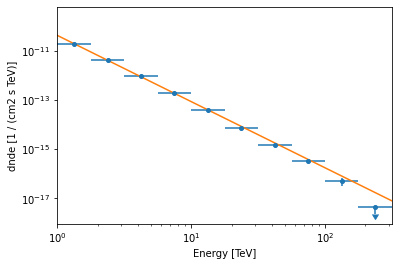

In [10]:
energy_bounds = [5e-1, 5e2] * u.TeV
ax = flux_points.plot()
model.spectral_model.plot(ax=ax, energy_bounds=energy_bounds)

## Now, split into multiple fp

In [14]:
t1 = flux_points.to_table()

In [15]:
datasets2 = []
for i in range(len(t1)):
    fp = flux_points.from_table(t1[i:i+1])
    ds = FluxPointsDataset(data=fp, name=str(i))
    datasets2.append(ds)
datasets2=Datasets(datasets2)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [16]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model2 = SkyModel(spectral_model=pwl, name="crab")

In [17]:
datasets2.models=model2

In [18]:
%%time
result2 = fit.run(datasets=datasets2)

CPU times: user 867 ms, sys: 6.61 ms, total: 874 ms
Wall time: 873 ms


In [19]:
datasets2.models.to_parameters_table()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str4,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
crab,spectral,index,2.6988e+00,,1.069e-02,nan,nan,False,False,
crab,spectral,amplitude,4.2377e-11,cm-2 s-1 TeV-1,7.289e-13,nan,nan,False,True,
crab,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,


No handles with labels found to put in legend.


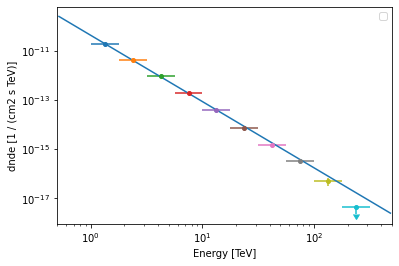

In [20]:
energy_bounds = [5e-1, 5e2] * u.TeV
ax = plt.subplot()
kwargs = {"ax": ax, "sed_type": "dnde"}
for d in datasets2:
    d.data.plot(**kwargs)
model2.spectral_model.plot(ax=ax, energy_bounds=energy_bounds)
ax.set_xlim(energy_bounds)
ax.legend()